Based on:

http://sdsawtelle.github.io/blog/output/week9-anomaly-andrew-ng-machine-learning-with-python.html

In [99]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Load the data

In [2]:
!ls "datasets/"

anomaly_X.txt                    anomaly_complex_validation_y.txt
anomaly_complex_X.txt            anomaly_validation_X.txt
anomaly_complex_validation_X.txt anomaly_validation_y.txt


In [3]:
# _ = np.loadtxt("datasets/anomaly_X.txt", delimiter=",")
X1 = np.loadtxt("datasets/anomaly_validation_X.txt", delimiter=",")
y1 = np.loadtxt("datasets/anomaly_validation_y.txt")
# y1_val = y1_val.reshape((len(y1_val), 1))

In [21]:
X1

array([[15.79   , 14.921  ],
       [13.64   , 15.33   ],
       [14.866  , 16.474  ],
       [13.585  , 13.989  ],
       [13.464  , 15.635  ],
       [12.949  , 16.14   ],
       [15.311  , 15.175  ],
       [13.898  , 15.432  ],
       [11.921  , 14.306  ],
       [14.859  , 14.901  ],
       [13.635  , 14.562  ],
       [15.76   , 15.133  ],
       [15.222  , 14.185  ],
       [12.106  , 13.427  ],
       [14.808  , 13.871  ],
       [15.361  , 15.99   ],
       [12.729  , 15.827  ],
       [15.385  , 15.21   ],
       [13.818  , 14.299  ],
       [15.379  , 15.902  ],
       [14.112  , 15.316  ],
       [12.824  , 13.697  ],
       [14.584  , 14.997  ],
       [14.295  , 15.847  ],
       [13.511  , 15.591  ],
       [13.714  , 15.355  ],
       [12.858  , 14.002  ],
       [14.57   , 14.224  ],
       [15.59   , 15.721  ],
       [13.1    , 15.09   ],
       [14.615  , 14.855  ],
       [13.928  , 16.094  ],
       [13.29   , 15.422  ],
       [14.328  , 15.011  ],
       [12.994

In [22]:
y1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [4]:
X1.shape

(307, 2)

In [5]:
y1.shape

(307,)

In [6]:
X2_normal = np.loadtxt("datasets/anomaly_complex_X.txt", delimiter=",")
y2 = np.loadtxt("datasets/anomaly_complex_validation_y.txt")
X2 = np.loadtxt("datasets/anomaly_complex_validation_X.txt", delimiter=",")

y2_normal = np.array([0] * len(X2_normal))

In [7]:
X2_normal.shape

(1000, 11)

In [8]:
X2.shape

(100, 11)

In [9]:
y2.shape

(100,)

In [10]:
y2 = np.concatenate([y2, y2_normal])
X2 = np.concatenate([X2, X2_normal])

In [23]:
X2

array([[ 18.271  , -12.359  ,   5.001  , ...,  -9.4767 , -25.928  ,
          7.1086 ],
       [ -3.1931 , -19.706  ,   6.5286 , ..., -10.968  ,  -1.1987 ,
          1.9084 ],
       [ -5.2567 , -12.919  ,  25.435  , ...,  -0.76875,  -3.2611 ,
         13.729  ],
       ...,
       [  5.4202 ,  -5.1098 ,  12.192  , ..., -13.899  ,   9.418  ,
          1.8414 ],
       [ 11.605  ,  -9.1342 ,  19.583  , ...,   1.0143 ,  -0.78407,
          6.2179 ],
       [  9.4913 , -12.824  ,  -0.51711, ...,  -9.0447 ,   7.7041 ,
          3.7488 ]])

In [24]:
y2

array([1., 0., 0., ..., 0., 0., 0.])

In [11]:
X1.shape, X2.shape

((307, 2), (1100, 11))

## Basic exploration

### 2d dataset

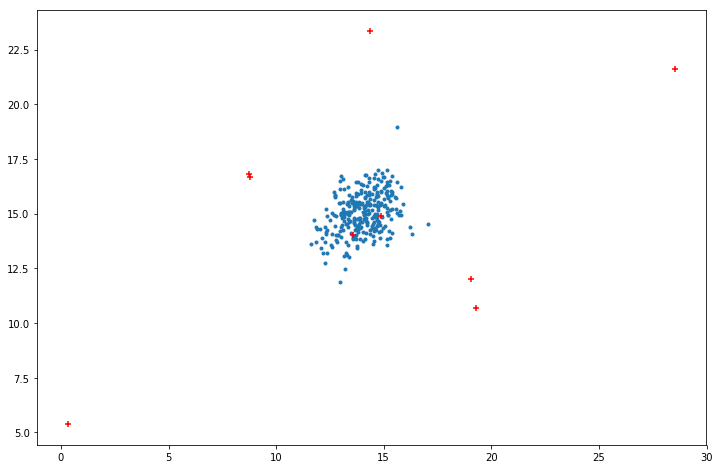

In [12]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.scatter(X1[y1 == 0, 0], X1[y1 == 0, 1], marker=".")
axes.scatter(X1[y1 == 1, 0], X1[y1 == 1, 1], color="red", marker="+")

### 3d dataset

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA(n_components=3)

In [19]:
X_scaled = scaler.fit_transform(X2)
X_pca = pca.fit_transform(X_scaled)

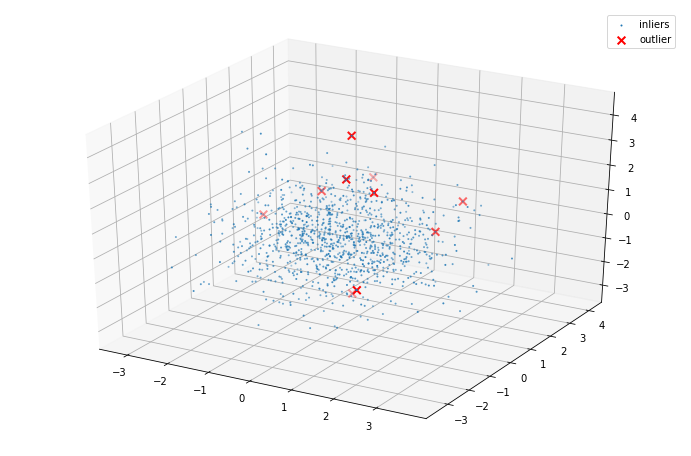

In [20]:
# Plot all the ground truth points together with the predictions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot the compressed data points
ax.scatter(X_pca[:, 0], X_pca[:, 1], zs=X_pca[:, 2], s=4, lw=0, label="inliers")

# Plot x's for the ground truth outliers
ax.scatter(X_pca[y2 == 1, 0], X_pca[y2 == 1, 1], zs=X_pca[y2 == 1, 2],
           lw=2, s=60, marker="x", c="red", label="outlier")
ax.legend()


## Unsupervised AD with EllipticEnvelope

EllipticEnvelope is implementing multivariate Gaussian. It fits the tightest Gaussian (smallest volume ellipsoid) that it can while discarding some fixed fraction of contamination points set by the user. 

First let's pretend we don't have labels, i.e. we don't know which server responses actually heralded a server failure and are considered "anomalous". Let's see how reasonable of a picture we can paint with an unsupervised approach.

A relatively simple model for the inlier-generating distribution is the multivariate Gaussian, which is parameterized by μ∈Rn
and a covariance matrix Σ∈Rnxn. This model can capture correlations between the data, so it can distort the Gaussian along any xi=x2 line and take an ellipsoid shape generally. The class EllipticEnvelope takes your unlabeled X and fits such a multivariate Gaussian density to it.

The presence of outliers in X can cause a huge distortion in the fitted Gaussian, but a more robust estimate can be had by modifying the parameter contamination which indicates the fraction of points in X which the class is free to discard in fitting. EllipticEnvelope will then determine which points to discard such that it can fit the ellipsoid with smallest volume. With an unlableled data set we'll have to guess a reasonable level for outlier contamination: something between 0 and 5 % should be realistic if your dealing with actual outliers.

In [25]:
X1

array([[15.79   , 14.921  ],
       [13.64   , 15.33   ],
       [14.866  , 16.474  ],
       [13.585  , 13.989  ],
       [13.464  , 15.635  ],
       [12.949  , 16.14   ],
       [15.311  , 15.175  ],
       [13.898  , 15.432  ],
       [11.921  , 14.306  ],
       [14.859  , 14.901  ],
       [13.635  , 14.562  ],
       [15.76   , 15.133  ],
       [15.222  , 14.185  ],
       [12.106  , 13.427  ],
       [14.808  , 13.871  ],
       [15.361  , 15.99   ],
       [12.729  , 15.827  ],
       [15.385  , 15.21   ],
       [13.818  , 14.299  ],
       [15.379  , 15.902  ],
       [14.112  , 15.316  ],
       [12.824  , 13.697  ],
       [14.584  , 14.997  ],
       [14.295  , 15.847  ],
       [13.511  , 15.591  ],
       [13.714  , 15.355  ],
       [12.858  , 14.002  ],
       [14.57   , 14.224  ],
       [15.59   , 15.721  ],
       [13.1    , 15.09   ],
       [14.615  , 14.855  ],
       [13.928  , 16.094  ],
       [13.29   , 15.422  ],
       [14.328  , 15.011  ],
       [12.994

In [195]:
from sklearn.covariance import EllipticEnvelope
outlier_frac = 0.01
elliptic_out = EllipticEnvelope(contamination=outlier_frac)
elliptic_out.fit(X1)

EllipticEnvelope(assume_centered=False, contamination=0.01, random_state=None,
         store_precision=True, support_fraction=None)

Per usual, this class implements a predict method which returns a binary "outlier" or "not outlier" decision. Alternatively the decision_function method returns a continuous value that reflects the fitted density at the input point(s).

In [196]:
# Binary prediction of normal vs. outlier - outlier points are predicted as -1
pred = elliptic_out.predict(X1)
pred[pred==1] = 0
pred[pred==-1] = 1
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [197]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [198]:
# Continuous output of the decision_function
decision = elliptic_out.decision_function(X1)
decision.min(), decision.max()

(-1.9708394418514175, 4.373802515871124)

In [199]:
# Get the "thresholding" value from the decision function
threshold = scipy.stats.scoreatpercentile(elliptic_out.decision_function(X1), 100 * outlier_frac)
threshold

0.0029128129423136237

A good way to visualize the fitted Gaussian distributions are with a countour plot over a meshgrid representing our feature plane.

In [200]:
# TODO: understand this.
# Make a meshgrid for the (x1, x2) feature space.
x1s = np.linspace(np.min(X1[:, 0]) - 5, np.max(X1[:, 0]) + 5, 15)
x2s = np.linspace(np.min(X1[:, 1]) - 5, np.max(X1[:, 1]) + 5, 15)
x1grid, x2grid = np.meshgrid(x1s, x2s)
x1grid.shape, x2grid.shape

((15, 15), (15, 15))

In [201]:
# Make predictions for each point on the grid.
Xgrid = np.column_stack((x1grid.ravel(), x2grid.ravel())) # Feature matrix containing all grid points
dens = elliptic_out.decision_function(Xgrid)
densgrid = dens.reshape(x1grid.shape) # Reshape the vector of densities back onto the "grid"

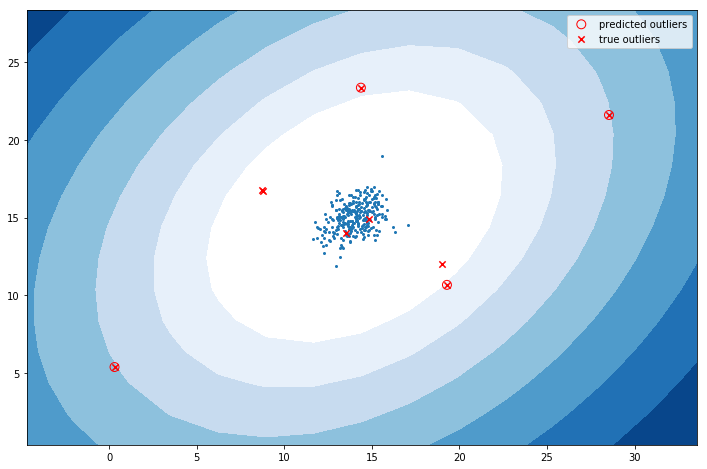

In [202]:
# Plot the points.
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X1[:, 0], X1[:, 1], s=4)

# Use the densites as the "z" values in a contour plot on the grid
ax.contourf(x1grid, x2grid, densgrid, cmap=plt.cm.Blues_r, levels=np.linspace(dens.min(), threshold, 7))

# Plot circles around the predicted outliers.
ax.scatter(X1[pred == 1, 0], X1[pred == 1, 1],
           facecolor="none", color="red", s=80, label="predicted outliers")
ax.scatter(X1[y1 == 1, 0], X1[y1 == 1, 1], color="red", marker="x", s=40, label="true outliers")
ax.legend()

In [203]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
accuracy_score(y1, pred)

0.9837133550488599

In [204]:
f1_score(y1, pred)

0.6153846153846153

In [205]:
conf_matrix = confusion_matrix(y1, pred)
conf_matrix

array([[298,   0],
       [  5,   4]])

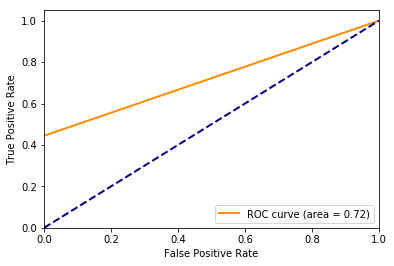

In [206]:
fpr, tpr, _ = roc_curve(y1, pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

## EllipticEnvelope and GridSearchCV

Obviously we don't want to just guess a good contamination value - and in higher dimensional sets we'd be hard-pressed to get any kind of visual feedback on our guesses. Since we have labels for our data we can run use EllipticEnvelope in a supervised way with a grid search through the contamination parameter.

First we need to recast our y-values into the form that EllipticEnvelope uses: 1 and -1 rather than 0 and 1. We'll also reshape it to the right sklearn shape (a true vector rather than an array of arrays).

In [182]:
y1 = y1.astype(np.int8)
y1_trans = y1.copy()
y1_trans[y1_trans==1] = -1
y1_trans[y1_trans==0] = 1

Sadly with very skewed classes we can't do simple K-Fold cross-validation because we probably won't get a good sampling of the underrepresented class in each fold. We instead want StratifiedKFold, which pays attention to lables to ensure a representative balance in each fold. This would* be what GridSearchCV uses by default if our estimator was a classifier, but EllipticEnvelope is not. So instead we need to specify the grid search cv as an iterable which contains manual train/test splits..

In [186]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
folds = list(skf.split(X1, y1_trans))

Finally, the default scoring for EllipticEnvelope is mean classification accuracy, which is absolutely terrible for skewed class applications (it does very well by just ignoring the underrepresented class entirely). We'll want to instead use the f1 metric which reflects how well the algorithm can correctly identify positive examples (outliers). This metric can be transformed into a sklearn scoring function using the make_scorer function.

In [187]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

f1sc = make_scorer(f1_score)
ps = {"contamination": np.linspace(0.0, 0.05, 15)}
search = GridSearchCV(estimator=elliptic_out, param_grid=ps, scoring=f1sc, cv=folds)
search.fit(X1, y1_trans)

GridSearchCV(cv=[(array([102, 103, ..., 305, 306]), array([  0,   1, ..., 101, 300])), (array([  0,   1, ..., 305, 306]), array([102, 103, ..., 302, 303])), (array([  0,   1, ..., 302, 303]), array([201, 202, ..., 305, 306]))],
       error_score='raise',
       estimator=EllipticEnvelope(assume_centered=False, contamination=0.0178571428571,
         random_state=None, store_precision=True, support_fraction=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'contamination': array([0.     , 0.00357, 0.00714, 0.01071, 0.01429, 0.01786, 0.02143,
       0.025  , 0.02857, 0.03214, 0.03571, 0.03929, 0.04286, 0.04643,
       0.05   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score), verbose=0)

In [189]:
res_df = pd.DataFrame(search.cv_results_)

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

In [194]:
res_df[["mean_test_score", "std_test_score", "params"]].sort_values(by="mean_test_score", ascending=False)

,mean_test_score,std_test_score,params
5,0.996678,0.004675,{'contamination': 0.01785714285714286}
4,0.995009,0.004045,{'contamination': 0.014285714285714287}
6,0.993288,0.004736,{'contamination': 0.02142857142857143}
3,0.990050,0.003985,{'contamination': 0.010714285714285714}
0,0.988413,0.004629,{'contamination': 0.0}
1,0.988413,0.004629,{'contamination': 0.0035714285714285718}
2,0.988413,0.004629,{'contamination': 0.0071428571428571435}
7,0.988141,0.006486,{'contamination': 0.025}
8,0.988141,0.006486,{'contamination': 0.028571428571428574}
9,0.984716,0.004380,{'contamination': 0.03214285714285715}


In [220]:
optimal_elliptic = search.best_estimator_
pred = optimal_elliptic.predict(X1)
pred[pred==1] = 0
pred[pred==-1] = 1
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

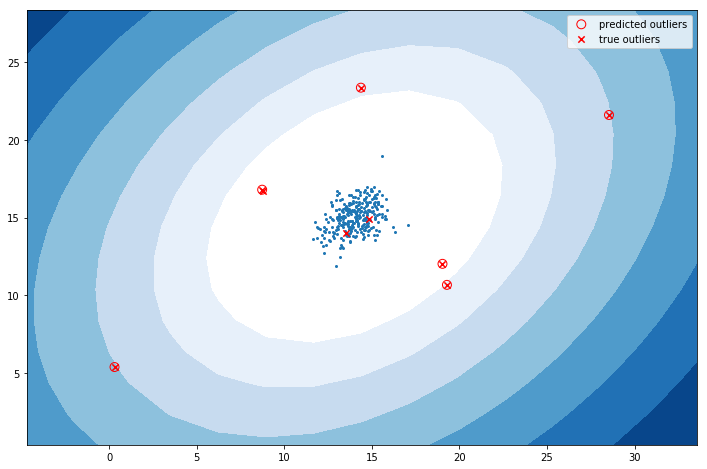

In [221]:
# Plot the points.
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X1[:, 0], X1[:, 1], s=4)

# Use the densites as the "z" values in a contour plot on the grid
ax.contourf(x1grid, x2grid, densgrid, cmap=plt.cm.Blues_r, levels=np.linspace(dens.min(), threshold, 7))

# Plot circles around the predicted outliers.
ax.scatter(X1[pred == 1, 0], X1[pred == 1, 1],
           facecolor="none", color="red", s=80, label="predicted outliers")
ax.scatter(X1[y1 == 1, 0], X1[y1 == 1, 1], color="red", marker="x", s=40, label="true outliers")
ax.legend()

In [222]:
accuracy_score(y1, pred)

0.990228013029316

In [223]:
f1_score(y1, pred)

0.8

In [224]:
conf_matrix = confusion_matrix(y1, pred)
conf_matrix

array([[298,   0],
       [  3,   6]])

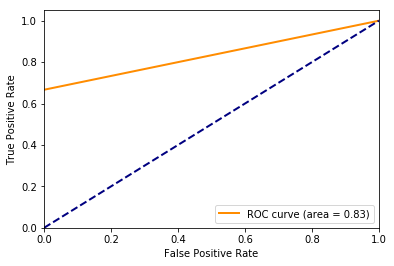

In [225]:
fpr, tpr, _ = roc_curve(y1, pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")

## Higher dimensional EllipticEnvelope

Now let's try this on the high-dimensional data set. 

To fit the full multivariate Gaussian we need at least n2/2 points, where n is the number of features.

In [226]:
X2

array([[ 18.271  , -12.359  ,   5.001  , ...,  -9.4767 , -25.928  ,
          7.1086 ],
       [ -3.1931 , -19.706  ,   6.5286 , ..., -10.968  ,  -1.1987 ,
          1.9084 ],
       [ -5.2567 , -12.919  ,  25.435  , ...,  -0.76875,  -3.2611 ,
         13.729  ],
       ...,
       [  5.4202 ,  -5.1098 ,  12.192  , ..., -13.899  ,   9.418  ,
          1.8414 ],
       [ 11.605  ,  -9.1342 ,  19.583  , ...,   1.0143 ,  -0.78407,
          6.2179 ],
       [  9.4913 , -12.824  ,  -0.51711, ...,  -9.0447 ,   7.7041 ,
          3.7488 ]])

In [230]:
y2

array([1., 0., 0., ..., 0., 0., 0.])

In [334]:
from sklearn.covariance import EllipticEnvelope
outlier_frac = 0.008
ell_env = EllipticEnvelope(contamination=outlier_frac)
ell_env.fit(X2)

EllipticEnvelope(assume_centered=False, contamination=0.008,
         random_state=None, store_precision=True, support_fraction=None)

In [335]:
pred = ell_env.predict(X2)
pred[pred == 1] = 0
pred[pred == -1] = 1
pred

array([0, 0, 0, ..., 0, 0, 0])

In [336]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

pca = PCA(n_components=3)
X2_pca = pca.fit_transform(X2_scaled)

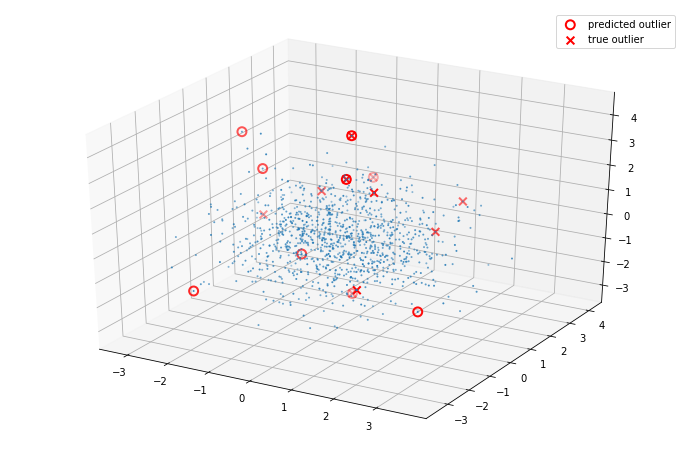

In [311]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the reduced dimensionality data points
ax.scatter(X2_pca[:, 0], X2_pca[:, 1], zs=X2_pca[:, 2], s=4, lw=0)

# Plot circles around the predicted outliers
ax.scatter(X2_pca[pred==1, 0], X2_pca[pred==1, 1], zs=X2_pca[pred==1, 2], 
           lw=2, facecolors="none", edgecolors="r", s=80, label="predicted outlier")

# Plot x's for the ground truth outliers
ax.scatter(X2_pca[y2==1, 0], X2_pca[y2==1, 1], zs=X2_pca[y2==1, 2], 
           lw=2, s=60, marker="x", c="red", label="true outlier")
ax.legend()

In [312]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

pca = PCA(n_components=2)
X2_pca = pca.fit_transform(X2_scaled)

In [318]:
# Get the "thresholding" value from the decision function
threshold = scipy.stats.scoreatpercentile(ell_env.decision_function(X2), 100 * outlier_frac)
threshold

# TODO: understand this.
# Make a meshgrid for the (x1, x2) feature space.
x1s = np.linspace(np.min(X2_pca[:, 0]) - 5, np.max(X2_pca[:, 0]) + 5, 15)
x2s = np.linspace(np.min(X2_pca[:, 1]) - 5, np.max(X2_pca[:, 1]) + 5, 15)
x1grid, x2grid = np.meshgrid(x1s, x2s)
x1grid.shape, x2grid.shape

# Make predictions for each point on the grid.
Xgrid = np.column_stack((x1grid.ravel(), x2grid.ravel())) # Feature matrix containing all grid points
dens = elliptic_out.decision_function(Xgrid)
densgrid = dens.reshape(x1grid.shape) # Reshape the vector of densities back onto the "grid"

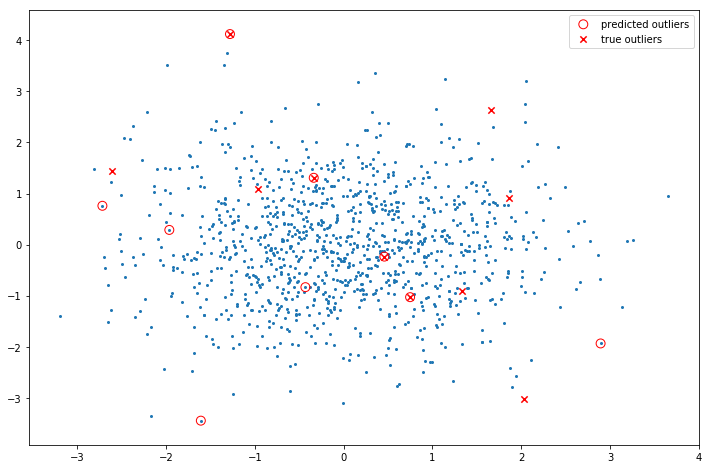

In [321]:
# Plot the points.
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X2_pca[:, 0], X2_pca[:, 1], s=4)

# TODO: Fix this.
# Use the densites as the "z" values in a contour plot on the grid
# ax.contourf(x1grid, x2grid, densgrid, cmap=plt.cm.Blues_r, levels=np.linspace(dens.min(), threshold, 7))

# # Plot circles around the predicted outliers.
ax.scatter(X2_pca[pred == 1, 0], X2_pca[pred == 1, 1],
           facecolor="none", color="red", s=80, label="predicted outliers")
ax.scatter(X2_pca[y2 == 1, 0], X2_pca[y2 == 1, 1], color="red", marker="x", s=40, label="true outliers")
ax.legend()

In [322]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, auc, roc_curve

In [323]:
accuracy_score(y2, pred)

0.99

In [324]:
f1_score(y2, pred)

0.4210526315789474

In [325]:
confusion_matrix(y2, pred)

array([[1085,    5],
       [   6,    4]])

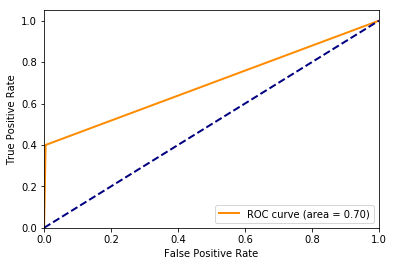

In [337]:
fpr, tpr, _ = roc_curve(y2, pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

## IsolationForests for High Dimensions

In [354]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=sum(y2==1)/len(y2))
# iso_forest.fit(X2, y2)
iso_forest.fit(X2)

IsolationForest(bootstrap=False, contamination=0.00909090909090909,
        max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
        random_state=None, verbose=0)

In [355]:
pred = iso_forest.predict(X2)
pred[pred==1] = 0
pred[pred==-1] = 1
pred

array([1, 0, 0, ..., 0, 0, 0])

In [356]:
y2

array([1., 0., 0., ..., 0., 0., 0.])

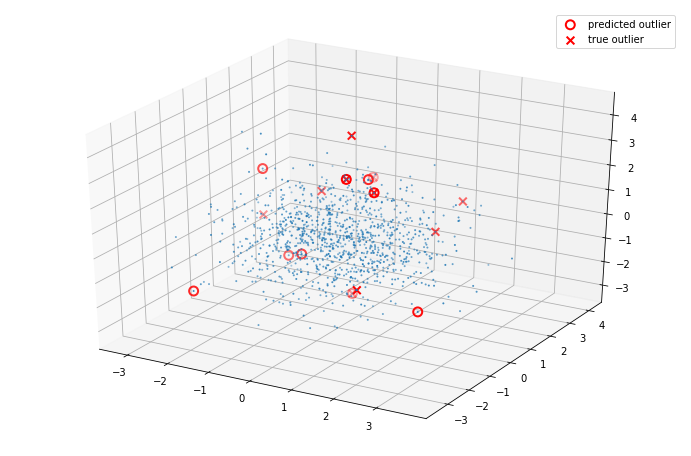

In [357]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the reduced dimensionality data points
ax.scatter(X2_pca[:, 0], X2_pca[:, 1], zs=X2_pca[:, 2], s=4, lw=0)

# Plot circles around the predicted outliers
ax.scatter(X2_pca[pred==1, 0], X2_pca[pred==1, 1], zs=X2_pca[pred==1, 2], 
           lw=2, facecolors="none", edgecolors="r", s=80, label="predicted outlier")

# Plot x's for the ground truth outliers
ax.scatter(X2_pca[y2==1, 0], X2_pca[y2==1, 1], zs=X2_pca[y2==1, 2], 
           lw=2, s=60, marker="x", c="red", label="true outlier")
ax.legend()

In [358]:
accuracy_score(y2, pred)

0.9890909090909091

In [359]:
f1_score(y2, pred)

0.4000000000000001

In [360]:
confusion_matrix(y2, pred)

array([[1084,    6],
       [   6,    4]])

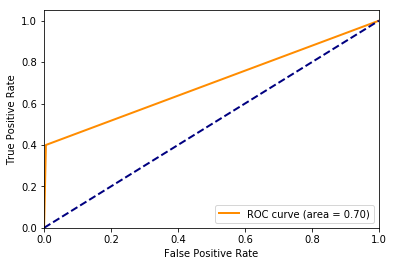

In [361]:
fpr, tpr, _ = roc_curve(y2, pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")